In [5]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
from mmcv.cnn import fuse_conv_bn
from mmcv.runner import wrap_fp16_model

In [192]:
model = init_detector('vfnet.py', 'vfnet/epoch_13.pth', device="cuda:0")
wrap_fp16_model(model)
model = fuse_conv_bn(model)

load checkpoint from local path: vfnet/epoch_13.pth


2022-06-20 13:31:00,081 - root - INFO - ModulatedDeformConvPack backbone.layer2.0.conv2 is upgraded to version 2.
2022-06-20 13:31:00,083 - root - INFO - ModulatedDeformConvPack backbone.layer2.1.conv2 is upgraded to version 2.
2022-06-20 13:31:00,085 - root - INFO - ModulatedDeformConvPack backbone.layer2.2.conv2 is upgraded to version 2.
2022-06-20 13:31:00,087 - root - INFO - ModulatedDeformConvPack backbone.layer2.3.conv2 is upgraded to version 2.
2022-06-20 13:31:00,089 - root - INFO - ModulatedDeformConvPack backbone.layer3.0.conv2 is upgraded to version 2.
2022-06-20 13:31:00,092 - root - INFO - ModulatedDeformConvPack backbone.layer3.1.conv2 is upgraded to version 2.
2022-06-20 13:31:00,094 - root - INFO - ModulatedDeformConvPack backbone.layer3.2.conv2 is upgraded to version 2.
2022-06-20 13:31:00,097 - root - INFO - ModulatedDeformConvPack backbone.layer3.3.conv2 is upgraded to version 2.
2022-06-20 13:31:00,099 - root - INFO - ModulatedDeformConvPack backbone.layer3.4.conv2 

In [193]:
import cv2
img = cv2.imread('sample.png')
h, w, c = img.shape
img = img[int(h*3/10):int(h*9/10), int(w*1/10):int(w*9/10), :]  # zoom 30% crop on top, 10% on bottom, 10% on left and right
result = inference_detector(model, img)

e:\pycharmprojects\til-2022\til-final-2022.1.1-lower\universenet\mmdet\datasets\utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


In [58]:
import glob
i = 0
for file in glob.glob('pics_new_zoom/*.png'):
  img = file
  result = inference_detector(model, img)
  model.show_result(img, result, out_file=f'results_zoom/{i}.jpg')
  i += 1

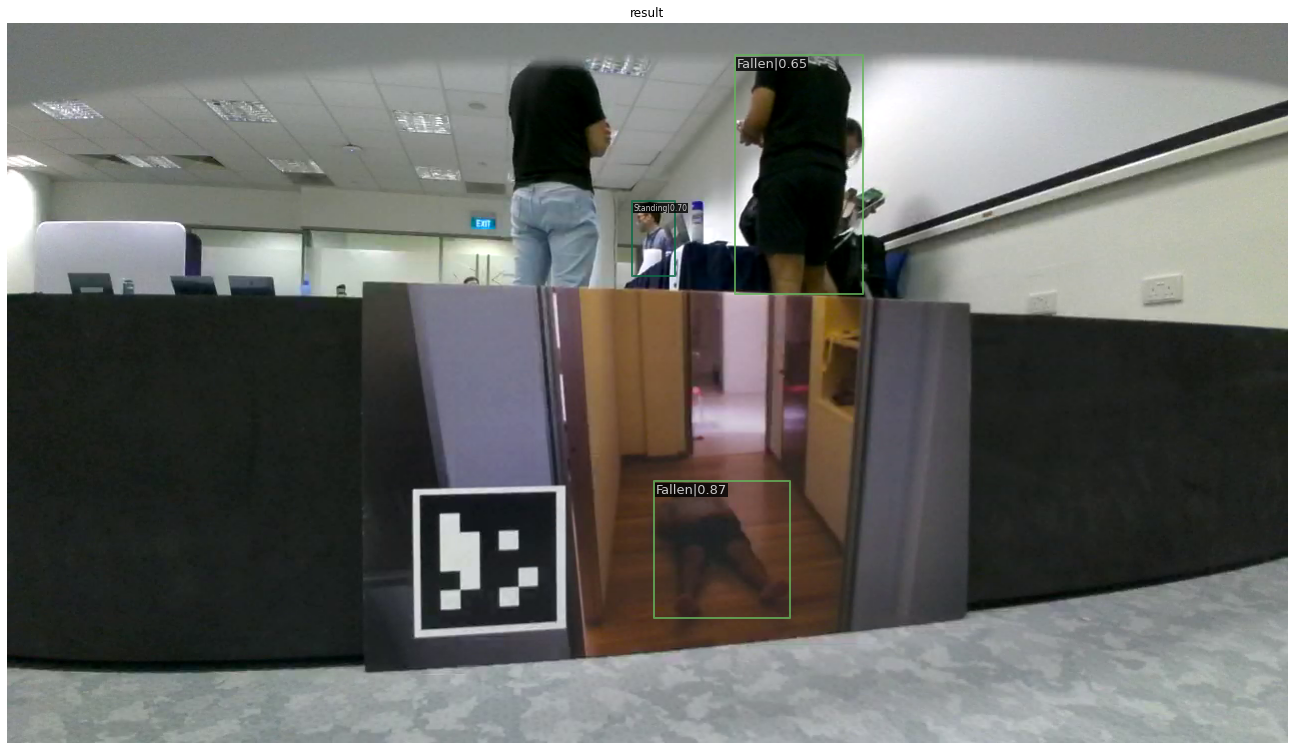

In [194]:
show_result_pyplot(model, img, result)